# Group Project: Web Scrabing Project to gather data from a Wikipedia page - (List of most profitable companies in 2022)

### Author: <font color='red'> Nakarin Philangam </font>

In [36]:
# Import the library used to open URLs 
import urllib.request
# Import BeautifulSoup to parse the HTML from bs4 
from bs4 import BeautifulSoup
# Specify the URL/web page 
url = "https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")

In [37]:
# get all tables
all_tables = soup.find_all("table")
# for table in all_tables:
#     print("TABLE:" + str(table) + "\n")

In [38]:
# get the table with the 'table' tag with class_="wikitable sortable"
all_sortable_tables = soup.find_all("table", class_="wikitable sortable")
# for table in all_sortable_tables:
#     print("SORTABLE TABLE:" + str(table) + "\n")

In [39]:
# get the 2nd 'wikitable sortable' table by using index[1]
right_table = all_sortable_tables[1]
print("RIGHT TABLE:" + str(right_table) + "\n")

RIGHT TABLE:<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Profits<br/>(USD millions)
</th></tr>
<tr>
<td>1
</td>
<td>Apple
</td>
<td>Electronics
</td>
<td style="text-align:center;">94,680
</td></tr>
<tr>
<td>2
</td>
<td><a href="/wiki/Berkshire_Hathaway" title="Berkshire Hathaway">Berkshire Hathaway</a>
</td>
<td><a href="/wiki/Conglomerate_(company)" title="Conglomerate (company)">Conglomerate</a>
</td>
<td style="text-align:center;">89,795
</td></tr>
<tr>
<td>3
</td>
<td><a href="/wiki/Alphabet_Inc." title="Alphabet Inc.">Alphabet</a>
</td>
<td>Technology
</td>
<td style="text-align:center;">76,033
</td></tr>
<tr>
<td>4
</td>
<td><a href="/wiki/Microsoft" title="Microsoft">Microsoft</a>
</td>
<td>Technology
</td>
<td style="text-align:center;">72,271
</td></tr>
<tr>
<td>5
</td>
<td><a href="/wiki/JPMorgan_Chase" title="JPMorgan Chase">JPMorgan Chase</a>
</td>
<td>Financials
</td>
<td style="text-align:center;

In [40]:
# create 4 list to store data
A = []
B = []
C = []
D = []

# get the data for every club in the table
for row in right_table.findAll('tr'):
    cells = row.findAll('td')
    if len(cells)==4:
        A.append(cells[0].find(text=True).strip())
        B.append(cells[1].find(text=True).strip())
        C.append(cells[2].find(text=True).strip())
        D.append(cells[3].find(text=True).strip())
        

In [41]:
# use a Pandas to create a DataFrame with the data
import pandas as pd
df = pd.DataFrame(A,columns=['Rank'])
df['Name']=B
df['Industry']=C
df['Profits (USD millions)']=D
df

,Rank,Name,Industry,Profits (USD millions)
0,1,Apple,Electronics,"94,680"
1,2,Berkshire Hathaway,Conglomerate,"89,795"
2,3,Alphabet,Technology,"76,033"
3,4,Microsoft,Technology,"72,271"
4,5,JPMorgan Chase,Financials,"48,334"
5,6,Meta,Technology,"39,370"
6,7,Amazon,Retail and Technology,"33,364"
7,8,Bank of America,Financials,"31,978"
8,9,ExxonMobil,Petroleum industry,"23,040"
9,10,Fannie Mae,Financials,"22,176"


In [42]:
# save the DataFrame (df) to a CSV file
# df.to_csv('CSC221-webscrape-data.csv')

In [43]:
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

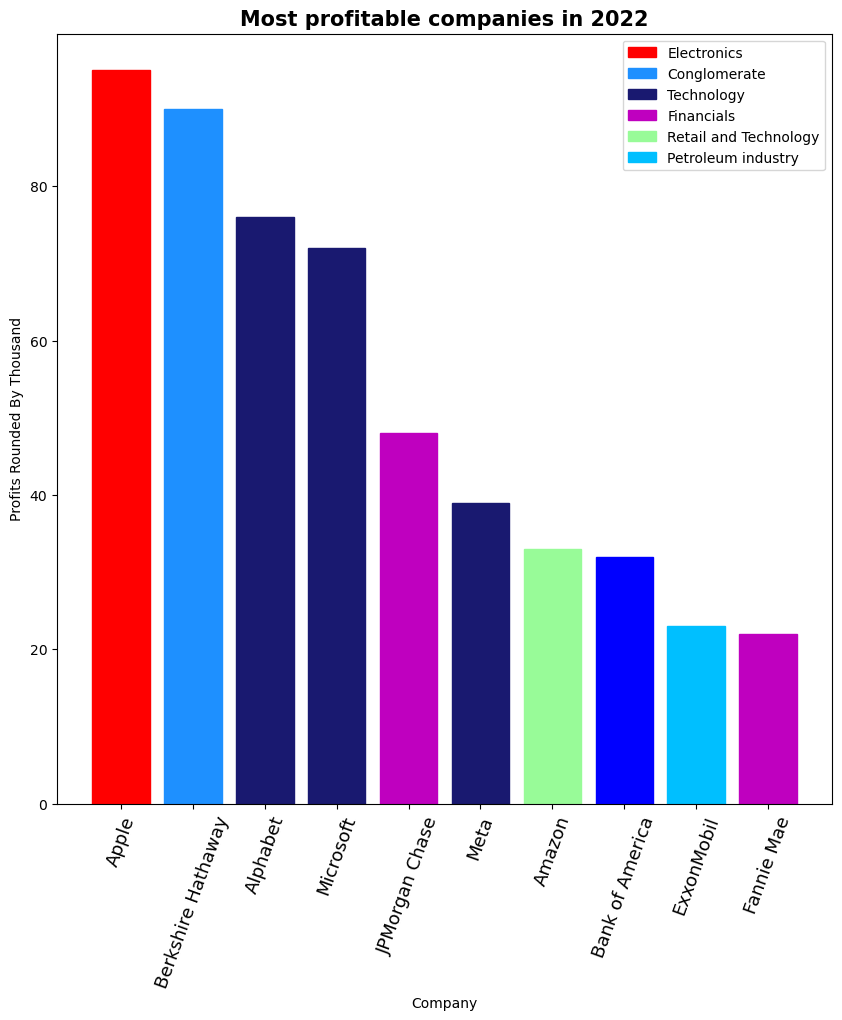

In [44]:
company = ['Apple','Berkshire Hathaway','Alphabet','Microsoft','JPMorgan Chase','Meta','Amazon','Bank of America','ExxonMobil','Fannie Mae']
revenue = [95, 90, 76,72,48,39,33,32,23,22]
plt.figure(figsize=(10,10))
plt.title("Most profitable companies in 2022", fontsize = '15', fontweight="bold")
electronics = mpatches.Patch(color='r', label='Electronics')
conglomerate = mpatches.Patch(color='dodgerblue', label='Conglomerate')
tech = mpatches.Patch(color='midnightblue', label='Technology')
financials = mpatches.Patch(color='m', label='Financials')
retail_tech = mpatches.Patch(color='palegreen', label='Retail and Technology')
petroleum = mpatches.Patch(color='deepskyblue', label='Petroleum industry')

plt.legend(handles=[electronics,conglomerate,tech, financials, retail_tech, petroleum], loc=1)
plt.xlabel("Company")
plt.ylabel("Profits Rounded By Thousand")
barlist = plt.bar(range(0, 10),revenue)
barlist[0].set_color('r')
barlist[1].set_color('dodgerblue')
barlist[2].set_color('midnightblue')
barlist[3].set_color('midnightblue')
barlist[4].set_color('m')
barlist[5].set_color('midnightblue')
barlist[6].set_color('palegreen')
barlist[7].set_color('b')
barlist[8].set_color('deepskyblue')
barlist[9].set_color('m')
plt.xticks(range(0, 10),company,fontsize=13, rotation=70)
plt.show()